In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_model(model):
    print(f'f_w = {model[0][0]} + {model[0][1]}*height')

In [3]:
def loss_function(X, y, w):
    N = y.shape[0]
    y_predict = X.dot(w)
    diff = y_predict - y
    
    gradient = np.zeros(w.shape[0])
    gradient = 1/N * (X.transpose().dot(diff))
    
    loss = 1/(2*N) * (np.sum(diff**2))
    
    return loss, gradient

In [5]:
def gradient_descent(X, y, w, num_iter, alpha, eps=None):
    loss_history = np.zeros((num_iter, 1))
    
    for i in range(num_iter):
        loss, gradient = loss_function(X, y, w)
        w = w - alpha * gradient
        
        loss_history[i] = loss
        print(f'Iteration {i+1}/{num_iter}: Loss = {loss}')
        
        if eps != None and i > 0:
            if abs(loss - loss_history[i-1]) <= eps:
                break
                
    return w, loss_history

In [18]:
height = np.linspace(1, 10)
weight = 2*height + 2.5*np.random.normal(size=(1, N))
N = height.shape[0]

X = np.ones((N, 2))
X[:, 1] = height
y = weight.reshape(-1, 1)

w = np.zeros((2, 1))
num_iter = 300
alpha = 0.01
eps = 10e-5
w, loss_history = gradient_descent(X, y, w, num_iter, alpha, eps)

Iteration 1/300: Loss = 71.53633734507119
Iteration 2/300: Loss = 29.214606883073593
Iteration 3/300: Loss = 12.993887436867807
Iteration 4/300: Loss = 6.776943126835514
Iteration 5/300: Loss = 4.394161299876637
Iteration 6/300: Loss = 3.4809049105705294
Iteration 7/300: Loss = 3.130875837597149
Iteration 8/300: Loss = 2.9967157891730807
Iteration 9/300: Loss = 2.945292212044984
Iteration 10/300: Loss = 2.925579185236682
Iteration 11/300: Loss = 2.918019924534831
Iteration 12/300: Loss = 2.915118870759222
Iteration 13/300: Loss = 2.9140031892231755
Iteration 14/300: Loss = 2.9135718040527134
Iteration 15/300: Loss = 2.9134027041321673
Iteration 16/300: Loss = 2.9133341445530325


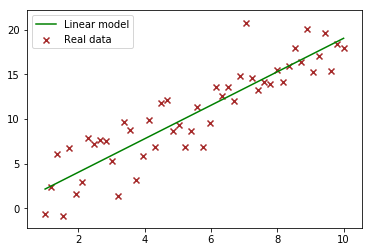

In [19]:
plt.plot(height, X.dot(w), color='green')
plt.scatter(height, weight, color='brown', marker='x')

plt.legend(['Linear model', 'Real data'])